In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew,kurtosis,normaltest,shapiro,jarque_bera

In [2]:
df=sns.load_dataset('mpg').dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


In [3]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


#  Imperical rule for normal distribution is defined as:
- 68% data lies within 1 std deviation.
- 95% data lies within 2 std deviation
- 99.7% data lies within 3 std deviation
- We can use this rule to check if the data is normally distributed or not
- we can also use skewness and kurtosis to check the normality of the data
- skewness should be between -0.5 to 0.5 for normal distribution
- kurtosis should be between 2 to 4 for normal distribution
- we can also use histogram to check the normality of the data


In [4]:
col='mpg'
data=df[col]
mean,std=data.mean(),data.std()
print(f"Mean: {mean}, Std: {std}")


Mean: 23.445918367346938, Std: 7.8050074865717995


In [5]:
#to find car with average mpg
print("mean+std:",mean+std)
print("mean-std:",mean-std)

mean+std: 31.250925853918737
mean-std: 15.640910880775138


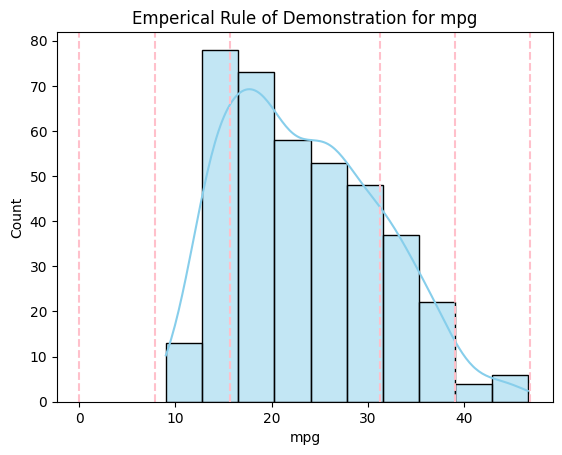

In [6]:
sns.histplot(x=data, kde=True, bins=10, color='skyblue')
for i in range(1,4):
    plt.axvline(mean+i*std,color='pink',linestyle='--')
    plt.axvline(mean-i*std,color='pink',linestyle='--')
plt.title(f"Emperical Rule of Demonstration for {col}")
plt.show()


# Skewness Analysis 
(for symmetry)
- skewness between -0.5 to 0.5 is fairly symmetrical
- skewness between 0.5 to 1 or between -0.5 to -1 is moderately skewed
- skewness >1 or skeweness< -1 is highly skewed
- skewness = 0 is perfectly skewed

horsepower Skewness: 1.08


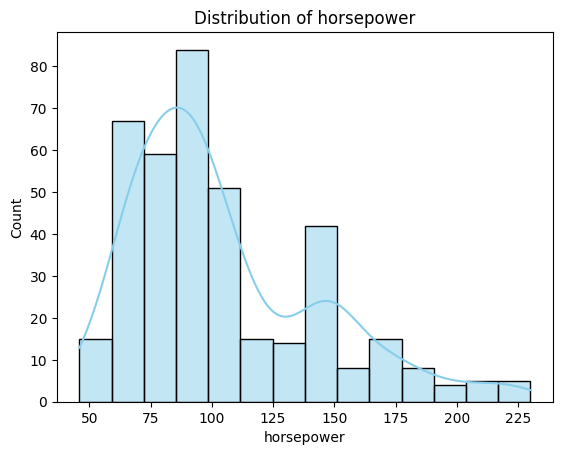

weight Skewness: 0.52


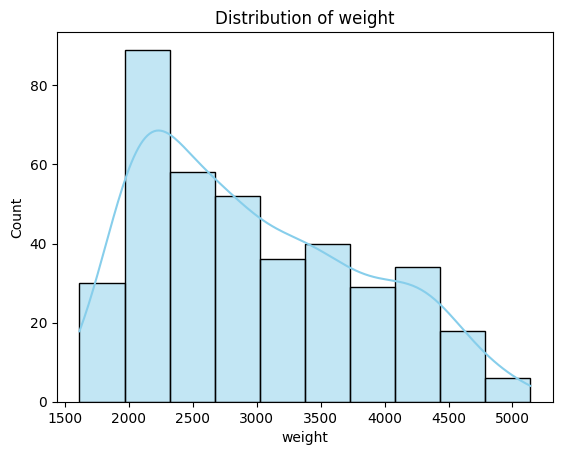

mpg Skewness: 0.46


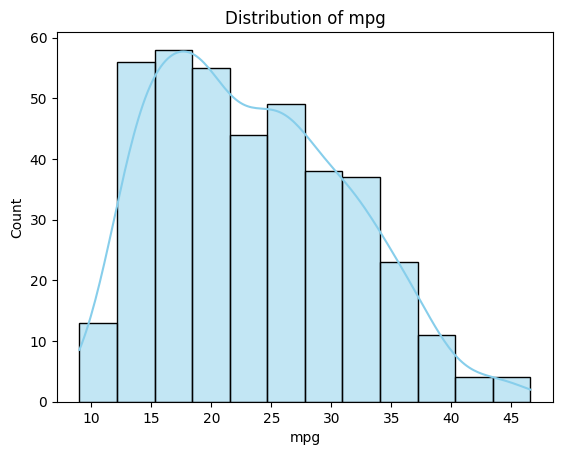

In [7]:
#checking skewness
for col in ["horsepower","weight","mpg"]:
    print(f"{col} Skewness: {skew(df[col]):.2f}")
    sns.histplot(x=df[col], kde=True, color='skyblue')
    plt.title (f"Distribution of {col}")
    plt.show()
#horsepower is highly skewed
#weight is moderately skewed
#mpg is fairly symmetrical

# Kurtosis
- kurtosis ~ 3: Mesokurtic, kurtosis similar to normal distribution 
- kurtosis > 3: Leptokurti, sharper peak and fatter tails
- kurtosis < 3: Platykurtic, flatter peak and thinner tails

horsepower Kurtosis: 0.67


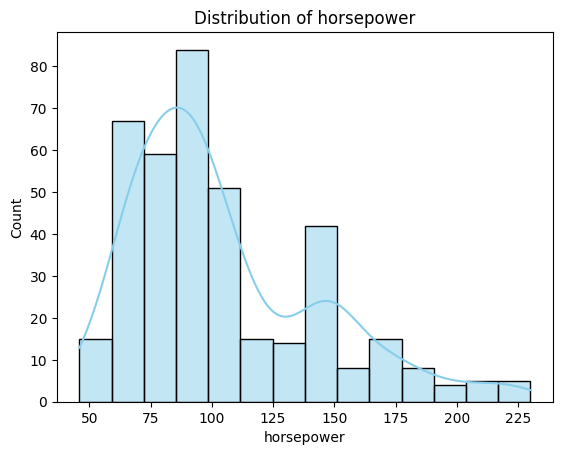

weight Kurtosis: -0.81


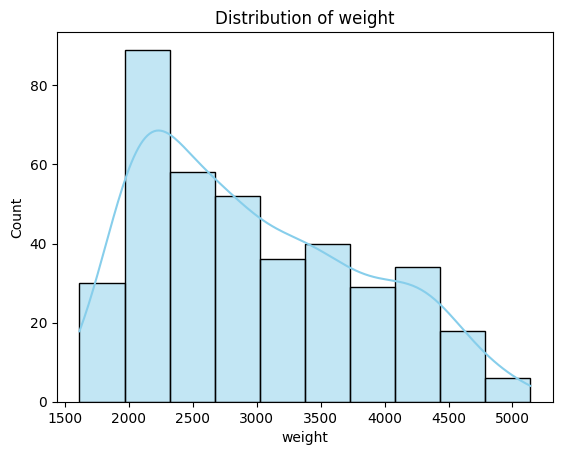

mpg Kurtosis: -0.52


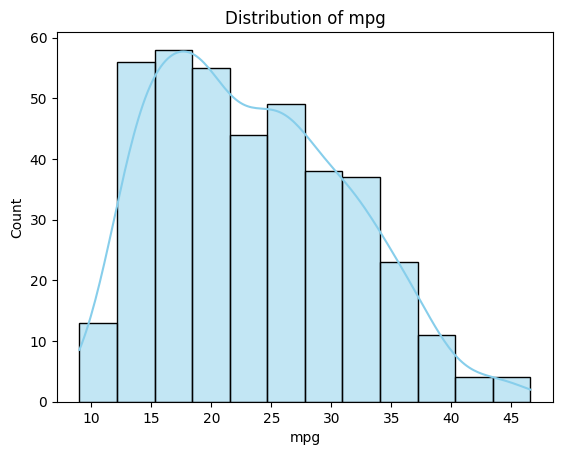

In [8]:
# Kurtosis of ["horsepower","weight","mpg"]:
for col in ["horsepower","weight","mpg"]:
    print(f"{col} Kurtosis: {kurtosis(df[col]):.2f}")
    sns.histplot(x=df[col], kde=True, color='skyblue')
    plt.title (f"Distribution of {col}")
    plt.show()


# Hypothesis and p-test
- null hypothesis: data follows normal distribution
- alternate hypothesis: data does not follow normal distribution
- p value< 0.05 reject null hypothesis
- p value>=0.05 accept null hypothesis


In [ ]:
# p-test
print("Normality Test for mpg:")
col='mpg'
data=df[col]
stat,p=shapiro(data)
print(f"Shapiro-Wilk Test: p={p:.4f} -> {'Normal' if p>0.05 else 'Not Normal'}")
stat,p=normaltest(data)
print(f"D'Agostino's K-squared Test: p={p:.4f} -> {'Normal' if p>0.05 else 'Not Normal'}")
stat,p=jarque_bera(data)
print(f"Jarque-Bera Test: p={p:.4f} -> {'Normal' if p>0.05 else 'Not Normal'}\n")

print("Normality Test for acceleration:")
col2='acceleration'
data2=df[col2]
stat,p=shapiro(data2)
print(f"Shapiro-Wilk Test: p={p:.4f} -> {'Normal' if p>0.05 else 'Not Normal'}")
stat,p=normaltest(data2)
print(f"D'Agostino's K-squared Test: p={p:.4f} -> {'Normal' if p>0.05 else 'Not Normal'}")
stat,p=jarque_bera(data2)
print(f"Jarque-Bera Test: p={p:.4f} -> {'Normal' if p>0.05 else 'Not Normal'}")




Normality Test for mpg:
Shapiro-Wilk Test: p=0.0000 -> Not Normal
D'Agostino's K-squared Test: p=0.0000 -> Not Normal
Jarque-Bera Test: p=0.0001 -> Not Normal

Normality Test for acceleration:
Shapiro-Wilk Test: p=0.0305 -> Not Normal
D'Agostino's K-squared Test: p=0.0165 -> Not Normal
Jarque-Bera Test: p=0.0147 -> Not Normal


## Log Transformation
- log transformation is applied if the data is right skewed
- application on only positive values


## Square root transformation
- it is applied when the data has moderate right skeweness
- it can handle positive values and zero also

## Cube Root Transformation
- it can handle both postively and negatively skewed data
- may accept positive and negative values

## Box-Cox Transformation
- combiation of power transformation and log transformation
- data must be stricly positive 
- very senstive to outliers

In [1]:
col='acceleration'
data=df[col]
#different normality tests may give different results on the same data.
transformations={
    'original': data,
    'log': np.log(data),
    'sqrt': np.sqrt(data),
    'Cube Root': np.cbrt(data),
    'box-cox': None,  #Box-Cox requires
    'yeo-jhonson': None
}

#box-cox (only if data>0)
from scipy.stats import boxcox, yeojohnson
if(data>0).all():
    transformations['Box-Cox'],_=boxcox(data)

#yeo-jhonson (safe for negatives/zeros)
transformations['Yeo-Jhonson'],_=yeojohnson(data)

#Test shapiro after transformations
for name,tdata in transformations.items():
    if tdata is not None:
        start,p=shapiro(tdata)
        print(f"{name:<12} -> Shapiro p={p:.4f} -> {'Normal' if p>0.05 else 'Not Normal'}")

NameError: name 'df' is not defined